# Analytical Solution Visualization

This notebook allows you to interactively explore the analytical solution of the Shallow Water Equations (SWE) by varying the physical parameters:
- `n`: Manning's roughness coefficient
- `u`: Constant velocity constraint
- `t`: Time snapshot

In [13]:
import os
import sys
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, interactive
from IPython.display import display

%matplotlib inline

# Add project root to path to import src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.physics import h_exact

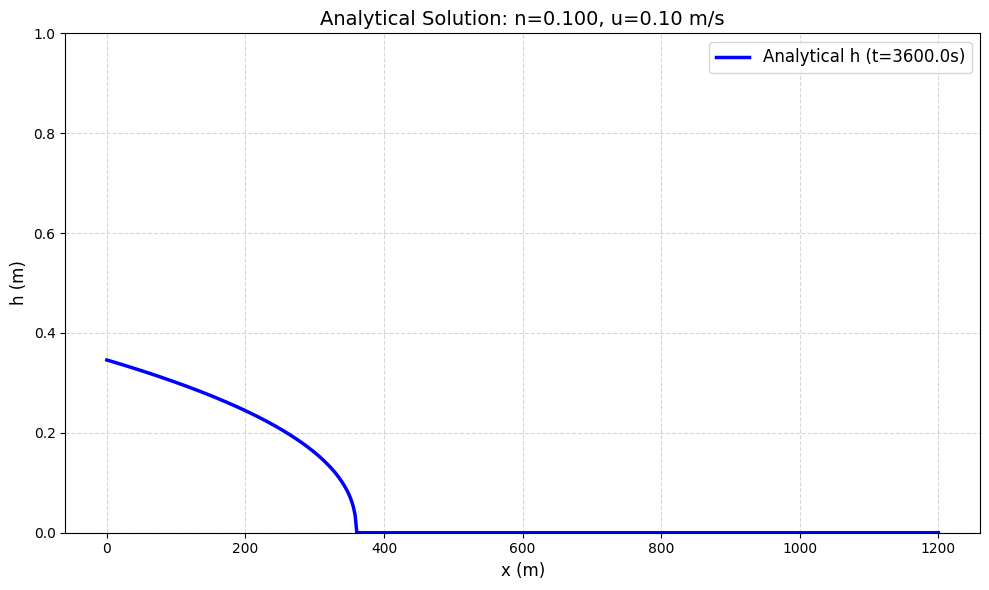

In [27]:
def plot_analytical(n_manning, u_const, t_time):
    """
    Plots the analytical solution h(x) for a fixed t.
    """
    Lx = 1200.0
    x = jnp.linspace(0, Lx, 500)
    
    # Create t array of same shape
    t_arr = jnp.full_like(x, t_time)
    
    # Calculate h
    h = h_exact(x, t_arr, n_manning, u_const)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, h, label=f'Analytical h (t={t_time:.1f}s)', linewidth=2.5, color='blue')
    plt.title(f'Analytical Solution: n={n_manning:.3f}, u={u_const:.2f} m/s', fontsize=14)
    plt.xlabel('x (m)', fontsize=12)
    plt.ylabel('h (m)', fontsize=12)
    
    # Dynamic ylim to keep plot stable but responsive
    # We estimate max possible h roughly or just let it auto-scale nicely
    # But for comparisons, maybe fixed is better? Let's use auto with a min margin.
    h_max = float(jnp.max(h))
    plt.ylim(bottom=0, top=max(h_max * 1.2, 1.0))
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Interactive widgets often fail in some remote environments. 
# Calling the function directly to verify plotting works.
plot_analytical(n_manning=0.10, u_const=0.10, t_time=3600)

# w = interactive(plot_analytical, 
#          n_manning=FloatSlider(min=0.01, max=0.1, step=0.001, value=0.03, description='n (Manning)'),
#          u_const=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='u (Velocity)'),
#          t_time=FloatSlider(min=0, max=4000, step=10, value=500, description='t (Time)'))
# display(w)